## EXERCICE SUR LES SERIES TEMPORELLES

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as num


In [2]:
data=pd.read_csv("./jeu_de_donnée/jeu_data1.csv")

In [3]:
data.head(7)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0


## valeur statisque

In [4]:
data["The_average_annual_payroll_of_the_region"].describe()

count    6.400000e+01
mean     2.869083e+07
std      1.057191e+06
min      2.740647e+07
25%      2.782857e+07
50%      2.819785e+07
75%      2.987852e+07
max      3.002468e+07
Name: The_average_annual_payroll_of_the_region, dtype: float64

In [5]:
moyenne=num.mean(data["The_average_annual_payroll_of_the_region"])
print('moyenne', moyenne)
variance=num.std(data["The_average_annual_payroll_of_the_region"])**2
print('variance',variance)
ecart_type=num.std(data["The_average_annual_payroll_of_the_region"])
print('ecart-type', ecart_type)

moyenne 28690829.625
variance 1100188490056.3594
ecart-type 1048898.7034296303


## Representation de la serie temporelle

In [6]:
data.dropna(inplace=True)
#suppression des valeurs manquantes

Text(0, 0.5, 'The_average_annual_payroll_of_the_region')

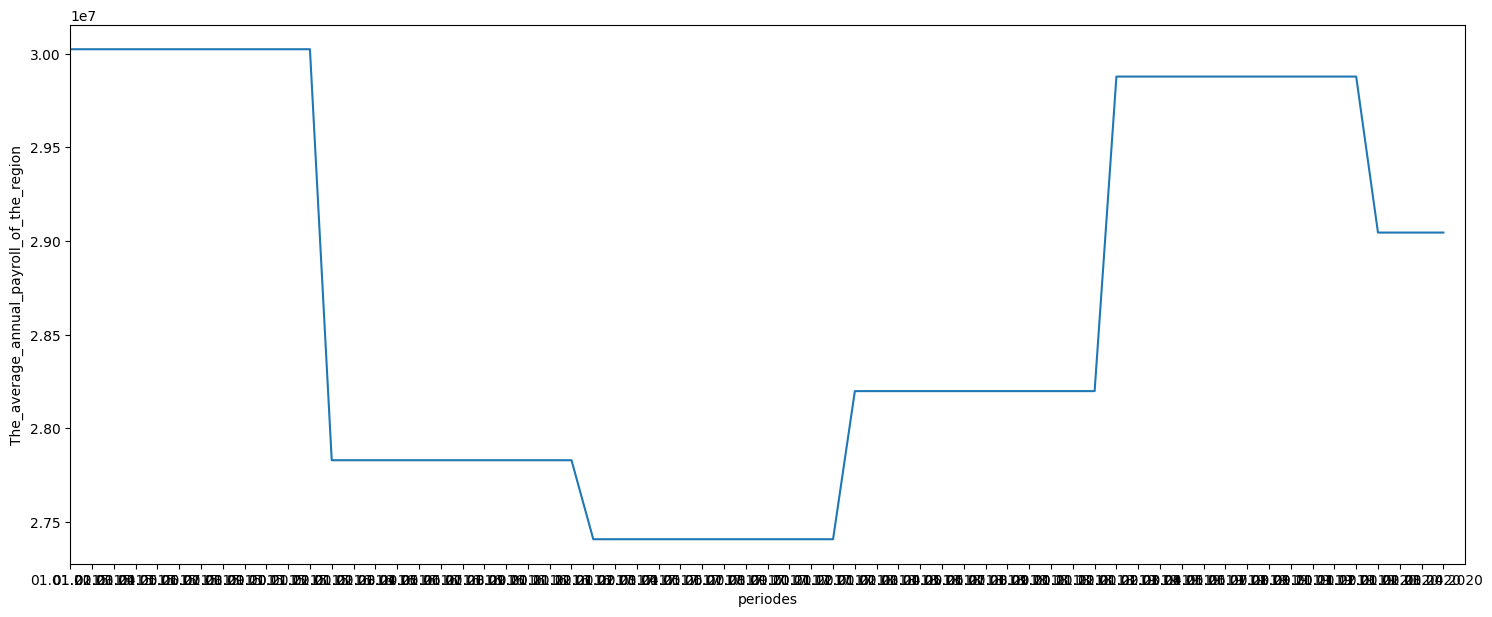

In [7]:
plot.figure(figsize=[18,7])
plot.plot(data["Period"],data["The_average_annual_payroll_of_the_region"])
plot.xlim(0,64)
plot.xlabel("periodes")
plot.ylabel("The_average_annual_payroll_of_the_region")

## Différents nuages de point

In [22]:
#N=1: (0-62)(1,63)
#sur les revenues

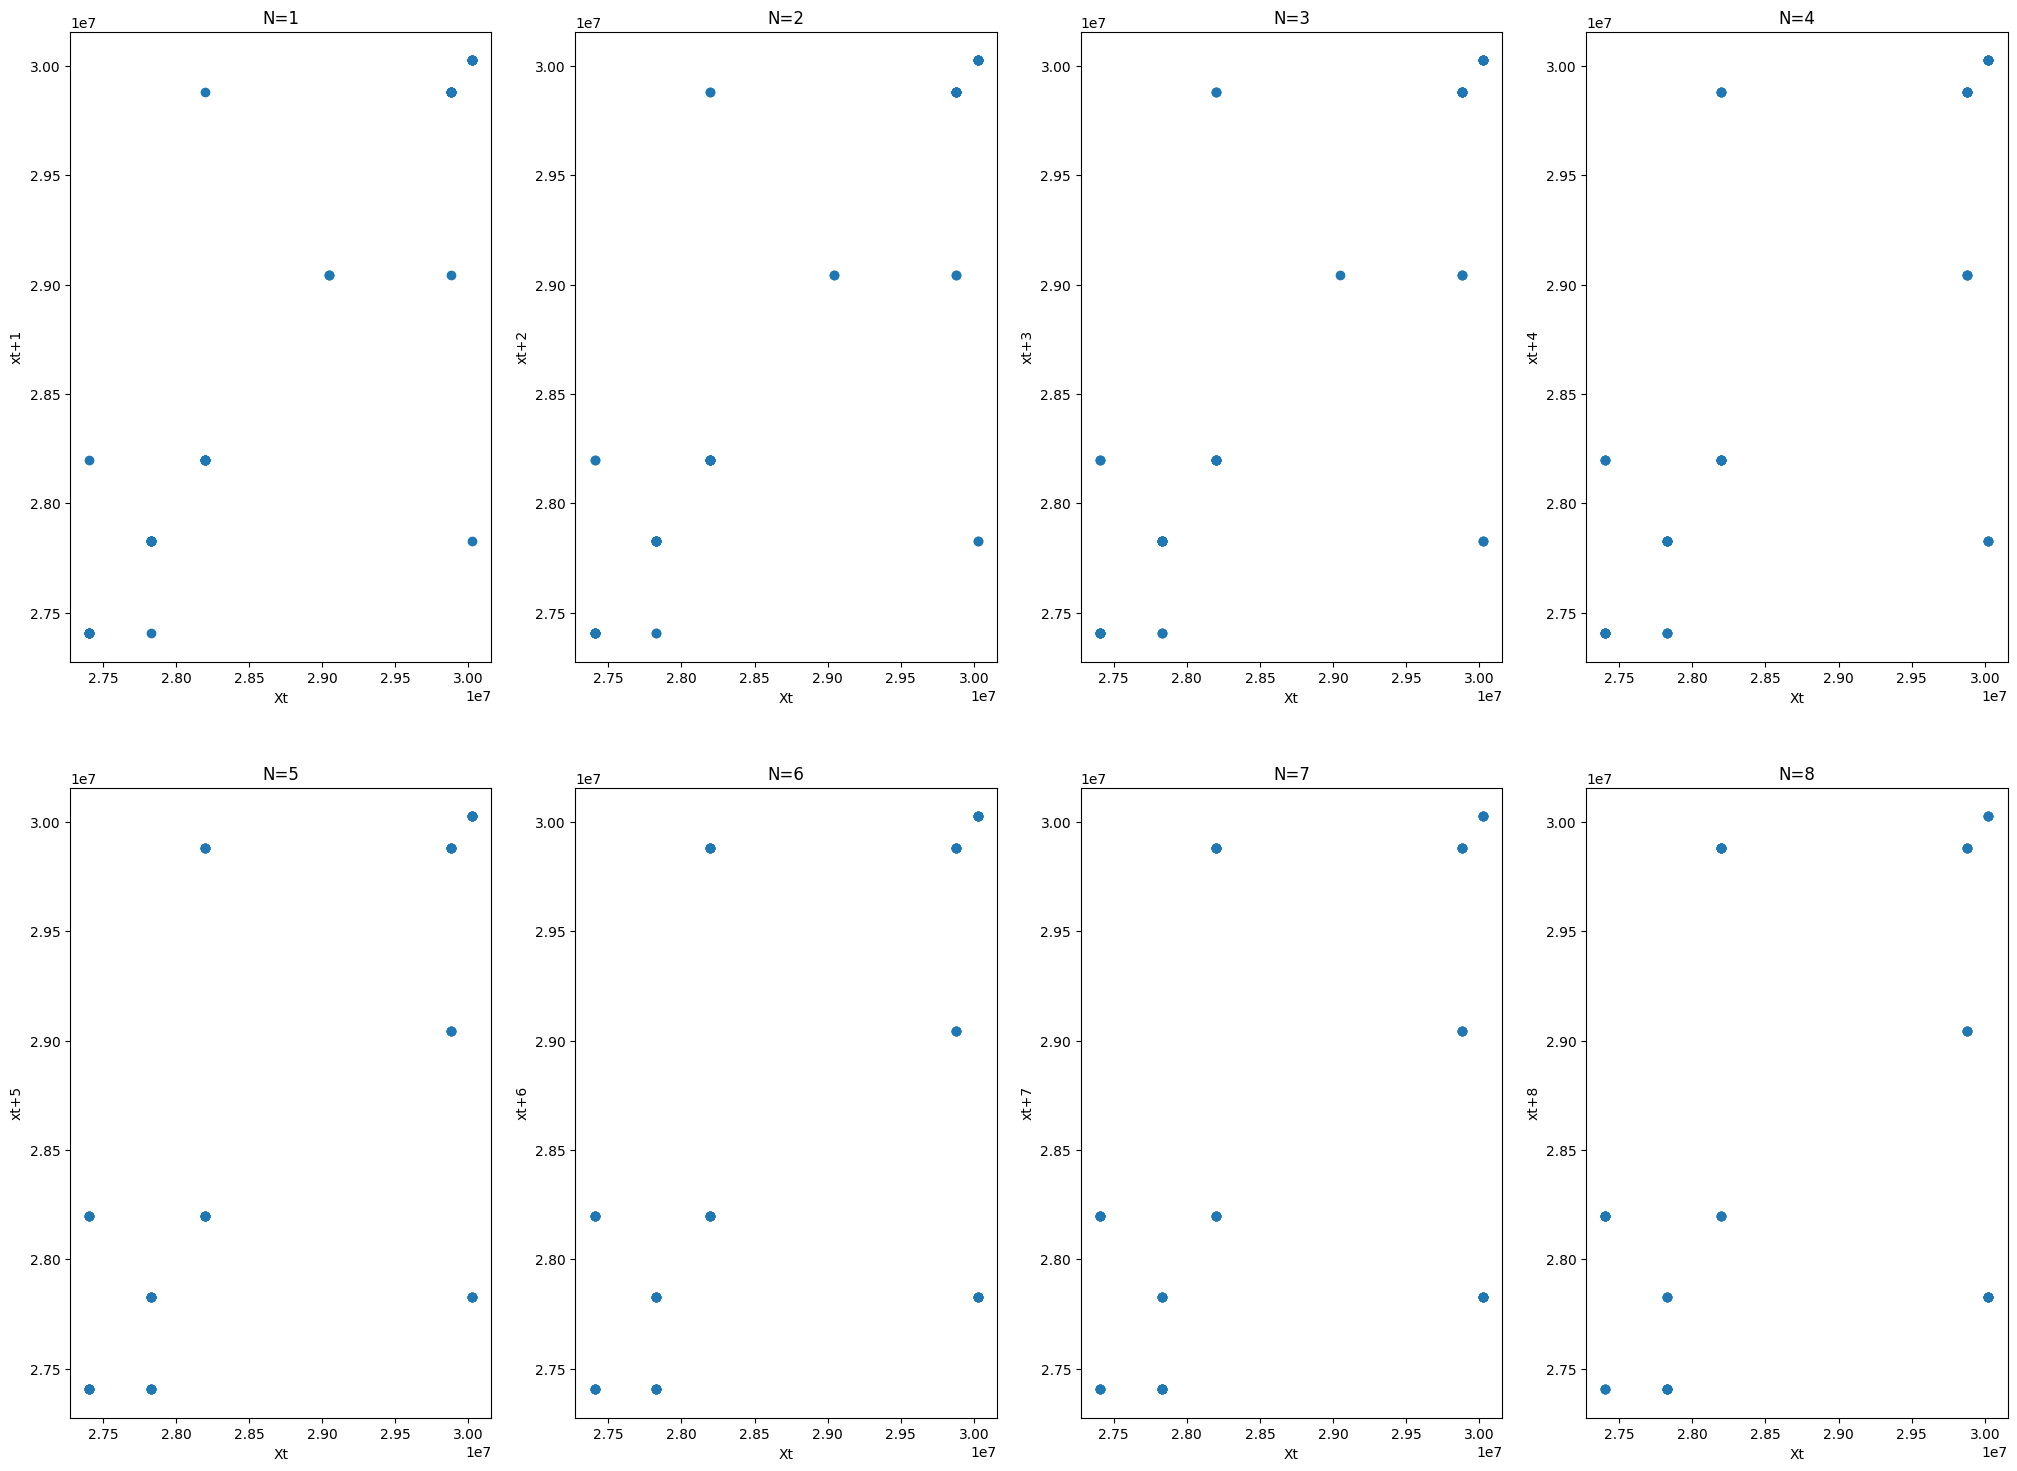

In [8]:
plot.figure(figsize=[25,18])
for N in range(1,9):
    plot.subplot(2,4,N)
    debut=0
    fin=64
    plot.title(f"N={N}")
    plot.xlabel("Xt")
    plot.ylabel(f"xt+{N}")
    plot.scatter(data["The_average_annual_payroll_of_the_region"][debut:fin-N],data["The_average_annual_payroll_of_the_region"][debut+N:fin])
    

## Représenter la courbe des auto-corrélations ρ̂n (k) avec
## k = 1...50 (50 valeurs de k)

In [9]:
moy=num.mean(data["The_average_annual_payroll_of_the_region"])

In [10]:
def auto_cov(data,k,moy):
    debut=0
    fin=len(data)
    xt=data[debut:fin-k]
    xt_k=data[debut+k:fin]
    cov=0
    for i in range(0,fin-k):
        cov=cov+(xt[i]-moy)*(xt_k[i]-moy)
        #calcul de L’auto-covariance empirique
    return (cov/(fin-k))

In [11]:
def auto_corr(data,k,moy):
    cov_0=auto_cov(data,0,moy)
    cov_k=auto_cov(data,k,moy)
    return (cov_k/cov_0)

In [12]:
correlation_k=[]
d=list(data["The_average_annual_payroll_of_the_region"])
for cov in range (1,51):
    res=auto_corr(d,cov,moy)
    correlation_k.append(res)
    

<BarContainer object of 50 artists>

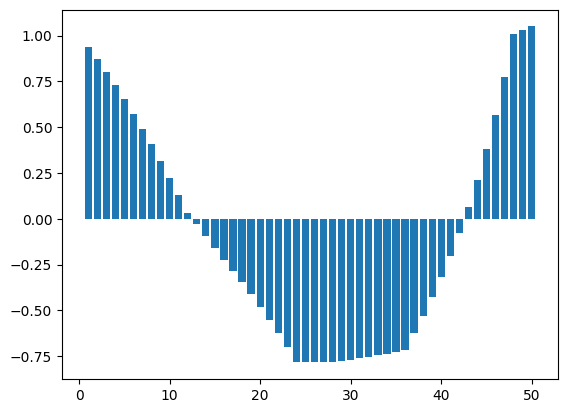

In [13]:
views=[i for i in range(1,51)]
plot.bar(views,correlation_k)